# Project: Predicting no-show medical appointments

## Table of Contents
<ul>
<li><a href="#intro">A. Introduction</a></li>
<li><a href="#wrangling">B. Data Wrangling</a></li>
<li><a href="#eda">C. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">D. Conclusions</a></li>
</ul>

<a id='intro'></a>
## A. Introduction

This project were completed as part of the 'Data Analyst' nanodegree with Udacity. 
The dataset, provided by Kaggle, collects information from 100k medical appointments in Brazil and is focused 
on the question of whether or not patients show up for their appointment. 
A number of characteristics about the patient are included in each row.
The goal of the project is to demonstrate the data analyst process (accessing, wrangling, EDA through visualization, drawing conclusions, effectively communicate) is well understood.

#### Questions most interesting to analyze:

1) What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

2) Which age group are most likely to not show up?

3) Are no shows related to certain hospitals ?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from src.visuals import *

%matplotlib inline
sns.set(style='white', font_scale=1)

# suppress matplotlib user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

<a id='wrangling'></a>
## B. Data Wrangling


### General Properties

In [2]:
# Load data
df_patients = pd.read_csv('../data/noshowappointments_kagglev2_may_2016.csv')
df_patients.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# how many rows and colums does the dataset have ?
df_patients.shape

(110527, 14)

In [4]:
# which datatypes does the dataset have, and how many missing values can observed ?
df_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There seems to be no missing values, and a mixture of strings, integers and floats data types.
It's strange by first observation that a 'PatientId' which looks like keys, is of type float, this needs to be changed to integer

In [5]:
# how manu unique values does each column of the dataset have ?
df_patients.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We can clearly observe that appointment id is a unique key. We can see each patient can have more than one appointment

In [6]:
# show unique values for some columns
print('\nUNIQUE VALUES FOR COLUMNS: \n')
for col in df_patients.columns:
    if df_patients[col].nunique() < 200:
        print('Unique values for column {}: \n {} \n'.format(col, df_patients[col].sort_values().unique()))


UNIQUE VALUES FOR COLUMNS: 

Unique values for column Gender: 
 ['F' 'M'] 

Unique values for column AppointmentDay: 
 ['2016-04-29T00:00:00Z' '2016-05-02T00:00:00Z' '2016-05-03T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-05T00:00:00Z' '2016-05-06T00:00:00Z'
 '2016-05-09T00:00:00Z' '2016-05-10T00:00:00Z' '2016-05-11T00:00:00Z'
 '2016-05-12T00:00:00Z' '2016-05-13T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-05-16T00:00:00Z' '2016-05-17T00:00:00Z' '2016-05-18T00:00:00Z'
 '2016-05-19T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-24T00:00:00Z'
 '2016-05-25T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-06-01T00:00:00Z' '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z'
 '2016-06-06T00:00:00Z' '2016-06-07T00:00:00Z' '2016-06-08T00:00:00Z'] 

Unique values for column Age: 
 [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51 

In [7]:
# check if it's worth to convert handicap into a binary indicator, as it's the case with most other features
df_patients.groupby('Handcap')['No-show'].value_counts(normalize=False)

Handcap  No-show
0        No         86374
         Yes        21912
1        No          1676
         Yes          366
2        No           146
         Yes           37
3        No            10
         Yes            3
4        No             2
         Yes            1
Name: No-show, dtype: int64

Observations after analyzing unique values of each column: 
- Age: Values like 0, -1, 115 looks like it might be invalid or missing data - to be further analysed
- 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS received' all looks like binary indicators
- No-show: Change to binary indicator 1, 0  as well to fit with other binary columns
- Appointment day: looks like it covers a period of around 1 month
- Handcap: As the number of values for handicap 3 and 4 are so low and add little value to show/noshow, turn this into a binary feature as well

In [8]:
# Are any rows duplicated ?
df_patients.duplicated().sum()

0

No data seems to be duplicated

### Data Cleaning 

During accessing step, the following cleaning steps needs to be performed

- 1) Improve column headings 
- 2) Convert ScheduledDay and AppointmentDay to datetime format and drop the time. Appointment day has no time included in the data, their the value of time in appointment day is assumed to be of no value
- 3) Introduce new feature 'time_delay' which are the days passed between making an appointment and the appointment day itself. Perhaps when the appointments are made well in advance, patients simply forget ?
- 4) Introduce new feature 'appointment_dayofweek' which represent the day of the week of the appointment (e.g. Monday vs Friday). Do no show's occur more on specific weekdays ?    
- 5) Patient Id and Appointment Id are keys. Correct data types to integer and make these indexes
- 6) No-show: Change to binary indicator 1, 0 as well to fit with other binary columns. '1' means patient did not show up
- 7) Change 'gender' to binary indicator as well using 'get_dummies' function, in order to visualize relationships between other variables better
- 8) Age: Drop age = -1. Analyse values = 0. We assume these are new born babies, lets try to confirm this ?
- 9) Binarize handicap, as in general there are very little no_shows for increased disabilities       

In [9]:
df_patients_clean = df_patients.copy()

##### 1) Improve column headings
- Change column headers to lowercase
- rename '-' to '_'
- improve descriptions and syntax

In [10]:
# Correct heading names
df_patients_clean.columns = df_patients_clean.columns.str.replace('-', '_')
df_patients_clean.columns = df_patients_clean.columns.str.lower()
df_patients_clean.rename(columns={'patientid': 'patient_id', 
                                  'appointmentid': 'appointment_id',
                                  'scheduledday': 'scheduled_date', 
                                  'appointmentday': 'appointment_date', 
                                  'hipertension': 'hypertension', 
                                  'handcap': 'handicap'},
                          inplace=True)

df_patients_clean.head()    

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### 2) Convert date fields to datetime format
As appointment date has no time present, remove the time also from scheduled date

In [11]:
df_patients_clean['scheduled_date']   = pd.to_datetime(df_patients_clean['scheduled_date']).dt.date.astype('datetime64[ns]')
df_patients_clean['appointment_date'] = pd.to_datetime(df_patients_clean['appointment_date']).dt.date.astype('datetime64[ns]')
df_patients_clean.dtypes

patient_id                 float64
appointment_id               int64
gender                      object
scheduled_date      datetime64[ns]
appointment_date    datetime64[ns]
age                          int64
neighbourhood               object
scholarship                  int64
hypertension                 int64
diabetes                     int64
alcoholism                   int64
handicap                     int64
sms_received                 int64
no_show                     object
dtype: object

##### 3) Add new feature 'time_delay'
This feature will represent the waiting time for appointments, meaning the difference in days when an appointment was made and the actual date of the appointment

In [12]:
# add new feature 'time_delay' (in days) between date making the appointment and appointment day
df_patients_clean['time_delay'] = (df_patients_clean['appointment_date'] - df_patients_clean['scheduled_date']).dt.days
df_patients_clean.head(10)

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2


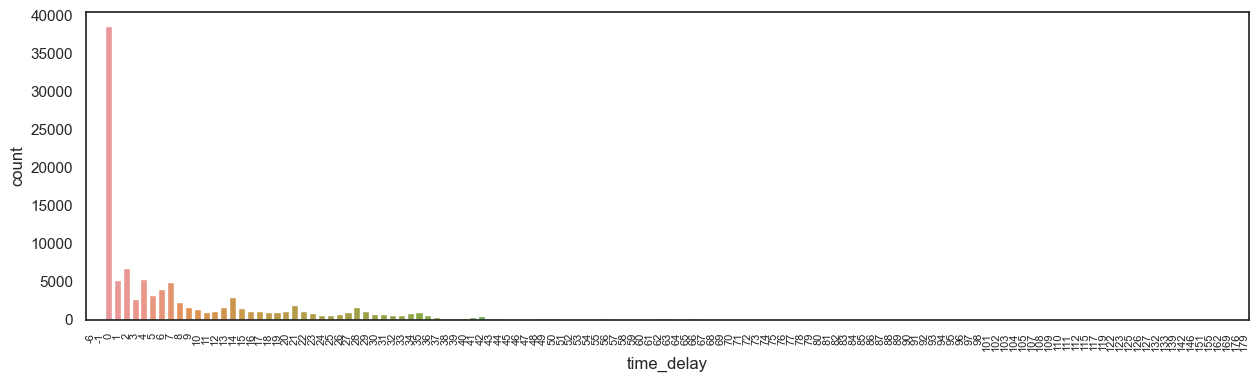

In [13]:
# Inspect distribution of the time delay
fig, ax = plt.subplots(figsize=(15,4))
plt.xticks(fontsize=8, rotation=90)
g = sns.countplot(x='time_delay', data=df_patients_clean, ax=ax);

Notice we get some negative values, lets inspect that further. We can also notice a long right tail with lots of small values. For better analysis it might better to introduce interval ranges instead

In [14]:
# Inspect records causing negative time_delays
df_patients_clean.query('time_delay < 0')

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [15]:
# delete records where appointment_date < scheduled date
df_patients_clean = df_patients_clean.drop(df_patients_clean.query('time_delay < 0').index)

In [16]:
# Make sure records with negative time delay are now deleted
df_patients_clean.query('time_delay < 0')

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay


In [17]:
# inspect the distribution of time_delay as it seems to have a long right detail with values 0 to 179
perc = df_patients_clean.time_delay.describe()
perc

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: time_delay, dtype: float64

In [18]:
# replace time_delay with range value instead that is build from percentiles to reduce the range of values
bin_edges = [perc['min'], perc['50%'], perc['75%'], perc['max']]
bin_labels = [perc['50%'], perc['75%'], perc['max']]
df_patients_clean['time_delay_ranges'] = pd.cut(df_patients_clean['time_delay'], 
                                         bins=bin_edges,
                                         include_lowest=True,
                                         labels=bin_labels)
df_patients_clean.head()

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4.0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4.0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4.0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4.0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4.0


In [19]:
time_ranges = df_patients_clean.groupby(['time_delay_ranges'])['no_show'].value_counts(normalize=True)
time_ranges.name = 'percentage'
time_ranges = time_ranges.reset_index()
time_ranges

,time_delay_ranges,no_show,percentage
0,4.0,No,0.890958
1,4.0,Yes,0.109042
2,15.0,No,0.714619
3,15.0,Yes,0.285381
4,179.0,No,0.672941
5,179.0,Yes,0.327059


In [20]:
# build labels of each interval
label1 = ('{} to {} days'.format(int(bin_edges[0]), int(bin_edges[1])))
label2 = ('{} to {} days'.format(int(bin_edges[1]) + 1, int(bin_edges[2])))
label3 = ('{} to {} days'.format(int(bin_edges[2]) + 1, int(bin_edges[3])))
bin_labels = [label1, label2, label3]
bin_labels

['0 to 4 days', '5 to 15 days', '16 to 179 days']

/opt/anaconda3/envs/da_noshow/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/da_noshow/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


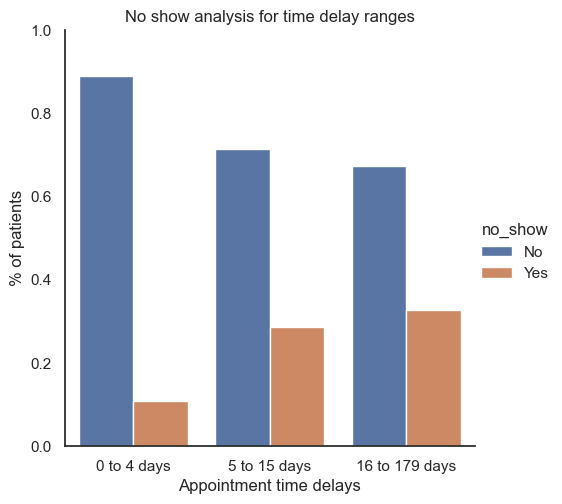

In [21]:
g = sns.catplot(kind='bar', x='time_delay_ranges', data=time_ranges, y='percentage', hue='no_show');
g.set_axis_labels("Appointment time delays", "% of patients")
g.set(ylim=(0, 1))
g.set_xticklabels(bin_labels)
plt.title('No show analysis for time delay ranges')
plt.show()

**Observation**: Notice how patients not showing up increase when the waiting time for appointments increase

##### 4) add new feature 'appointment_dayofweek'

In [22]:
# add new feature - the day of the appointment (e.g. Monday, Tuesday)
df_patients_clean['appointment_dayofweek'] = df_patients_clean['appointment_date'].dt.dayofweek
df_patients_clean.head(5)

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4.0,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4.0,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4.0,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4.0,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4.0,4


##### 5) Patient Id and Appointment Id are keys. Correct data types to integer and make these indexes

In [23]:
# Convert PatientId to integer, as this is a key without any decimals
df_patients_clean['patient_id'] = df_patients_clean['patient_id'].astype('int')
df_patients_clean.head()

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4.0,4
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4.0,4
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4.0,4
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4.0,4
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4.0,4


In [24]:
# set columns 'patientid' and 'appointmentid' as the index
df_patients_clean = df_patients_clean.set_index(['patient_id', 'appointment_id'])
df_patients_clean.head()

,,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek
patient_id,appointment_id,,,,,,,,,,,,,,,
29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4.0,4
558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4.0,4
4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4.0,4
867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4.0,4
8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4.0,4


In [25]:
# check that key is unique
print(df_patients_clean.index.is_unique)

True


##### 6) Change no_show to a binary indicator (1,0) to match with other features in the dataset

In [26]:
# First, lets count number of No/Yes values before
df_patients_clean['no_show'].value_counts()

No     88208
Yes    22314
Name: no_show, dtype: int64

In [27]:
 # No-show: Change to binary indicator 1, 0 as well to fit with other binary columns
df_patients_clean['no_show'] = df_patients_clean['no_show'].map({'No':0, 'Yes':1})
df_patients_clean['no_show'].value_counts()

0    88208
1    22314
Name: no_show, dtype: int64

In [28]:
df_patients_clean.head()

,,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek
patient_id,appointment_id,,,,,,,,,,,,,,,
29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,4.0,4
558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,4.0,4
4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,4.0,4
867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,4.0,4
8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,4.0,4


##### 7) Change 'gender' to a binary indicator (1,0) to make correlation analysis together with other features easier
0 = Female
1 = Male

In [29]:
df_patients_clean = pd.get_dummies(df_patients_clean, columns=['gender'])
df_patients_clean.head()

,,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek,gender_F,gender_M
patient_id,appointment_id,,,,,,,,,,,,,,,,
29872499824296,5642903,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,4.0,4,1,0
558997776694438,5642503,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,4.0,4,0,1
4262962299951,5642549,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,4.0,4,1,0
867951213174,5642828,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,4.0,4,1,0
8841186448183,5642494,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,4.0,4,1,0


##### 8) Age corrections
There seems to be patients with age 0, -1 and over 100 years. Analyse this a bit deeper to access the impact

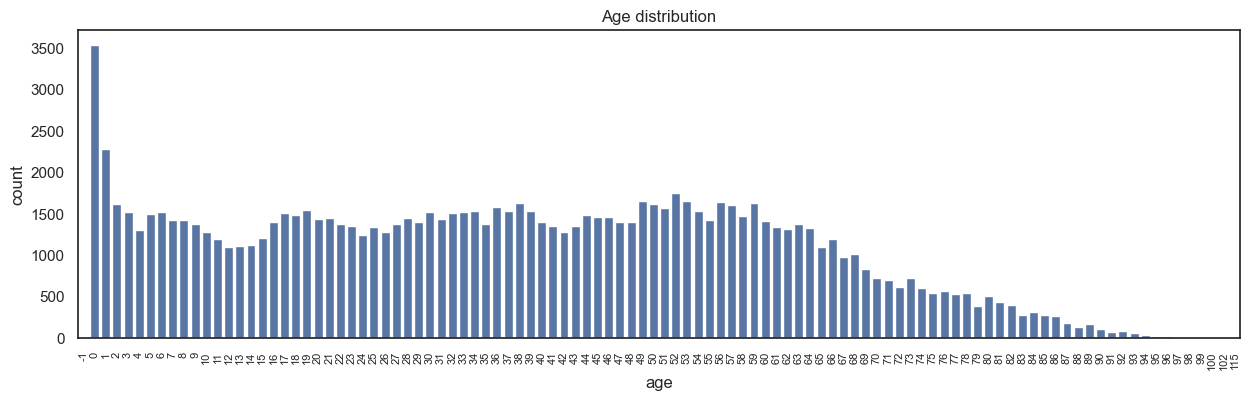

In [30]:
fig, ax = plt.subplots(figsize=(15,4))
plt.xticks(fontsize=8, rotation=90)
g = sns.countplot(x='age', data=df_patients_clean, ax=ax, color='b');
plt.title('Age distribution')
plt.show()

In [31]:
df_patients_clean['age'].value_counts().sort_index()

-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Name: age, Length: 104, dtype: int64

3539 patients have age = 0, this a high proportion of the dataset. I assume these are newborn babies

In [32]:
df_patients_clean.query('age == 0').groupby('no_show').sum()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,time_delay,appointment_dayofweek,gender_F,gender_M
no_show,,,,,,,,,,,
0,0,45,0,0,0,1,681,26836,5255,1402.0,1498.0
1,0,7,0,0,0,0,216,11031,1088,319.0,320.0


If patients with age = 0 are newborn babies, we don't expect to see scholorships or handicaps, these records looks like errors and should be deleted

In [33]:
# double check number of records before we delete invalid records
records_before = df_patients_clean.shape[0]
records_before

110522

In [34]:
# drop and make sure only 52 records was dropped
df_patients_clean = df_patients_clean.drop(df_patients_clean.query('age == 0 & scholarship > 0').index)
print('Number of records dropped: {}'.format(records_before - df_patients_clean.shape[0]))

Number of records dropped: 52


In [35]:
# drop record were age is -1 and make sure in total we dropped only 53 records
df_patients_clean = df_patients_clean.drop(df_patients_clean.query('age == -1').index)
print('Number of records dropped: {}'.format(records_before - df_patients_clean.shape[0]))

Number of records dropped: 53


#### 9) Convert handicap to binary indicator

In [36]:
 # Convert handicap into a binary indicator, 0 means disabilities, 1 means disability is present
df_patients_clean['handicap'] = df_patients_clean['handicap'].map({0:0, 1:1, 2:1, 3:1, 4:1})
df_patients_clean['handicap'].value_counts()

0    108230
1      2239
Name: handicap, dtype: int64

### Save cleaned dataset

In [37]:
# final check
df_patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 110469 entries, (29872499824296, 5642903) to (377511518121127, 5629448)
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   scheduled_date         110469 non-null  datetime64[ns]
 1   appointment_date       110469 non-null  datetime64[ns]
 2   age                    110469 non-null  int64         
 3   neighbourhood          110469 non-null  object        
 4   scholarship            110469 non-null  int64         
 5   hypertension           110469 non-null  int64         
 6   diabetes               110469 non-null  int64         
 7   alcoholism             110469 non-null  int64         
 8   handicap               110469 non-null  int64         
 9   sms_received           110469 non-null  int64         
 10  no_show                110469 non-null  int64         
 11  time_delay             110469 non-null  int64         
 12  

In [38]:
# write cleaned dataset to csv
df_patients_clean.to_csv('../data/noshowappointments_kagglev2_may_2016_cleaned.csv')

<a id='eda'></a>
## C. Exploratory Data Analysis

### Research Question 1
### Which features have the biggest impact to predict if a patient will show up for their scheduled appointment?

In [39]:
# read the cleaned data from csv
df_patients_clean = pd.read_csv('../data/noshowappointments_kagglev2_may_2016_cleaned.csv', index_col=[0,1])
df_patients_clean.head()

,,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek,gender_F,gender_M
patient_id,appointment_id,,,,,,,,,,,,,,,,
29872499824296,5642903,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,4.0,4,1,0
558997776694438,5642503,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,4.0,4,0,1
4262962299951,5642549,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,4.0,4,1,0
867951213174,5642828,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,4.0,4,1,0
8841186448183,5642494,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,4.0,4,1,0


#### C.1.1 First impressions

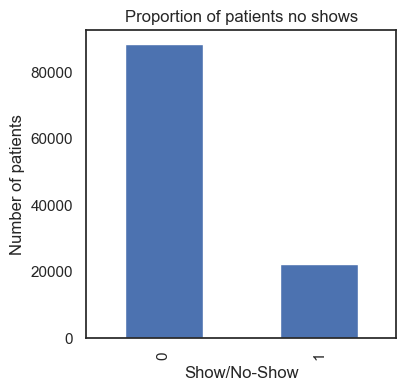

In [40]:
# what is the proportion of patients showing up vs no show ?
df_patients_clean['no_show'].value_counts().plot(kind='bar', 
                                                 xlabel='Show/No-Show', 
                                                 ylabel='Number of patients',
                                                 title='Proportion of patients no shows',
                                                 figsize=(4, 4));

In [41]:
prop = df_patients_clean['no_show'].value_counts(normalize=True) * 100
print('{}% of patients do not show up for their appointments'.format(round(prop[1],2)))

20.19% of patients do not show up for their appointments


#### C.1.2 Detect the features with greatest difference in means between patients showing up vs patients not showing up

In [42]:
# Get list of numerical columns
numerical_cols = list(df_patients_clean.select_dtypes([np.number]).columns.values)
numerical_cols

['age',
 'scholarship',
 'hypertension',
 'diabetes',
 'alcoholism',
 'handicap',
 'sms_received',
 'no_show',
 'time_delay',
 'time_delay_ranges',
 'appointment_dayofweek',
 'gender_F',
 'gender_M']

In [43]:
# Scale the data before calculating mean differences, in order to normalize the data for better comparisons
scaler = MinMaxScaler((0,1))
patients_scaled = scaler.fit_transform(df_patients_clean[numerical_cols])
df_patients_scaled = pd.DataFrame(patients_scaled, columns=numerical_cols)
df_patients_scaled.head()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek,gender_F,gender_M
0,0.539130,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.0
1,0.486957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,1.0
2,0.539130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.0
3,0.069565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.0
4,0.486957,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.0


In [44]:
# Calculate mean differences
df_patients_mean = df_patients_scaled.groupby('no_show').mean().T
df_patients_mean.columns = ['mean_show', 'mean_noshow']
df_patients_mean['mean_difference'] = abs(df_patients_mean['mean_noshow'] - df_patients_mean['mean_show'])
df_patients_mean = df_patients_mean.sort_values('mean_difference', ascending=False)
df_patients_mean

,mean_show,mean_noshow,mean_difference
time_delay_ranges,0.213357,0.405414,0.192057
sms_received,0.291407,0.438427,0.147021
time_delay,0.048913,0.088470,0.039556
hypertension,0.204499,0.169095,0.035404
age,0.328781,0.298510,0.030271
scholarship,0.093442,0.115255,0.021814
diabetes,0.073875,0.064105,0.009770
gender_F,0.649044,0.653965,0.004921
gender_M,0.350956,0.346035,0.004921
handicap,0.020803,0.018156,0.002647


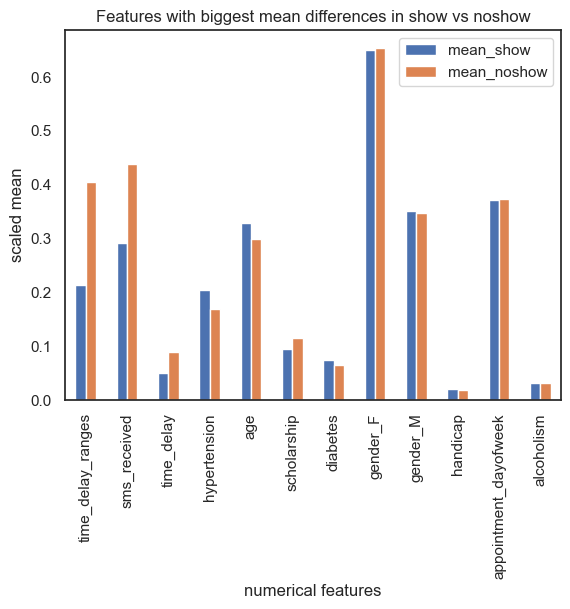

In [45]:
df_patients_mean[['mean_show', 'mean_noshow']].plot(kind='bar', 
                xlabel='numerical features', 
                ylabel='scaled mean', 
                title='Features with biggest mean differences in show vs noshow');

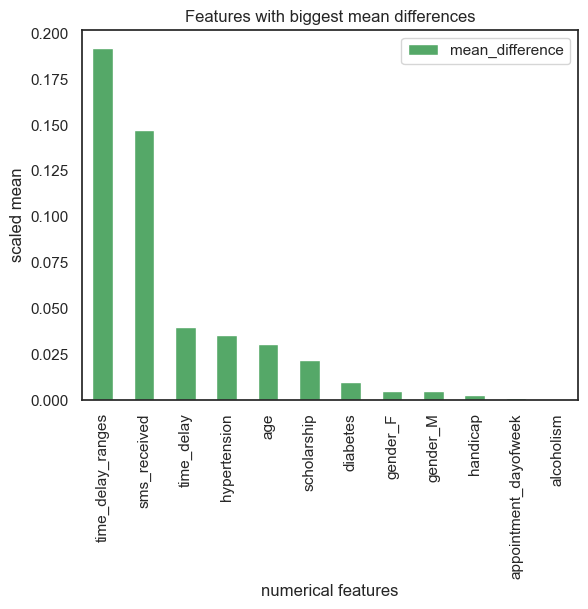

In [46]:
df_patients_mean[['mean_difference']].plot(kind='bar', 
                xlabel='numerical features', 
                ylabel='scaled mean', 
                color='g',
                title='Features with biggest mean differences');
plt.show()

**Conclusion:**
- Time_delay, sms_received, hypertension, age and scholarship are the most influential factors that contribute towards patients not showing up
- Alcoholism, day of the week of the appointment (e.g. Monday vs Friday), handicap and gender have little or no influence to predict if patients will show up or not
- Male and Female behaviour seems to be similar
- 'time_delay' between making the appointment vs day of appointment have the biggest predictive power. The '_ranges' addition of this feature are perhaps overstated as it contains the lower limit of the range, however think of it's a factor to detect to most influential features instead, and not a real value


#### C.1.3 Correlation analysis with 'no_show'
Lets further investigate feature relationships with show/no_show

In [47]:
# Get correlation of features with no_show
corr_matrix = df_patients_clean.corrwith(df_patients_clean["no_show"]).sort_values()
corr_matrix

age                     -0.060494
hypertension            -0.035710
diabetes                -0.015183
handicap                -0.007540
gender_M                -0.004142
alcoholism              -0.000195
appointment_dayofweek    0.001190
gender_F                 0.004142
scholarship              0.029474
sms_received             0.126409
time_delay_ranges        0.184386
time_delay               0.186306
no_show                  1.000000
dtype: float64

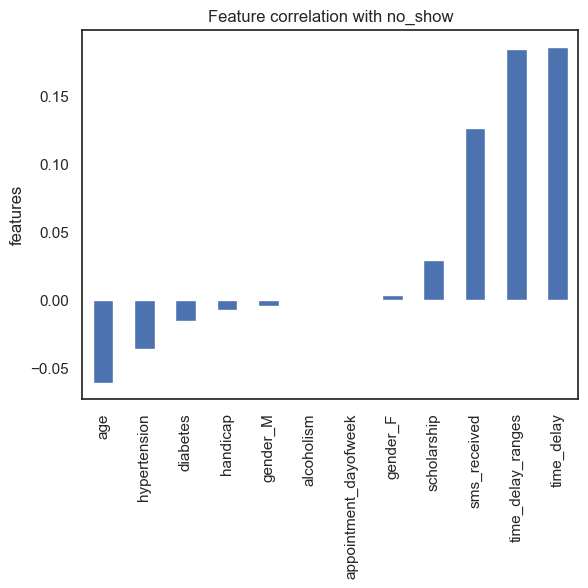

In [48]:
# Plot feature correlations to no_show
corr_matrix.drop('no_show', axis=0).plot(kind='bar')
plt.xticks(rotation='vertical')
plt.ylabel('correlation')
plt.ylabel('features')
plt.title('Feature correlation with no_show')
plt.show()

**Conclusion**

We get similar results to C.2 when we compared mean differences

- _'age'_: have the biggest negative correlation, meaning when age goes down, no_show goes up. This suggest that younger patients are more likely to not show up 
- _'hypertension'_: as the 2nd biggest negative correlation, means if hypertension goes up, patients are more likely to show up 
- _'time_delay'_: have the biggest positive correlation, means when the days between making an appointment and attending the appointment goes up, patients are more likely to not show up. 
- _'sms_received'_: even if patients receive an sms, they still do not show up ? The relationship between time delays and receiving sms's need to be deeper analysed below.
- _'scholarship'_: those patients receiving financial help are more likely to not show up ? We need to further explore this relationship

Let's focus deeper on the most influetial features only

#### C.1.4 Correlation analysis between most influential features

In [49]:
influential_features = ['age', 'hypertension', 'diabetes', 'handicap', 'scholarship', 'sms_received', 
                        'time_delay', 'no_show']

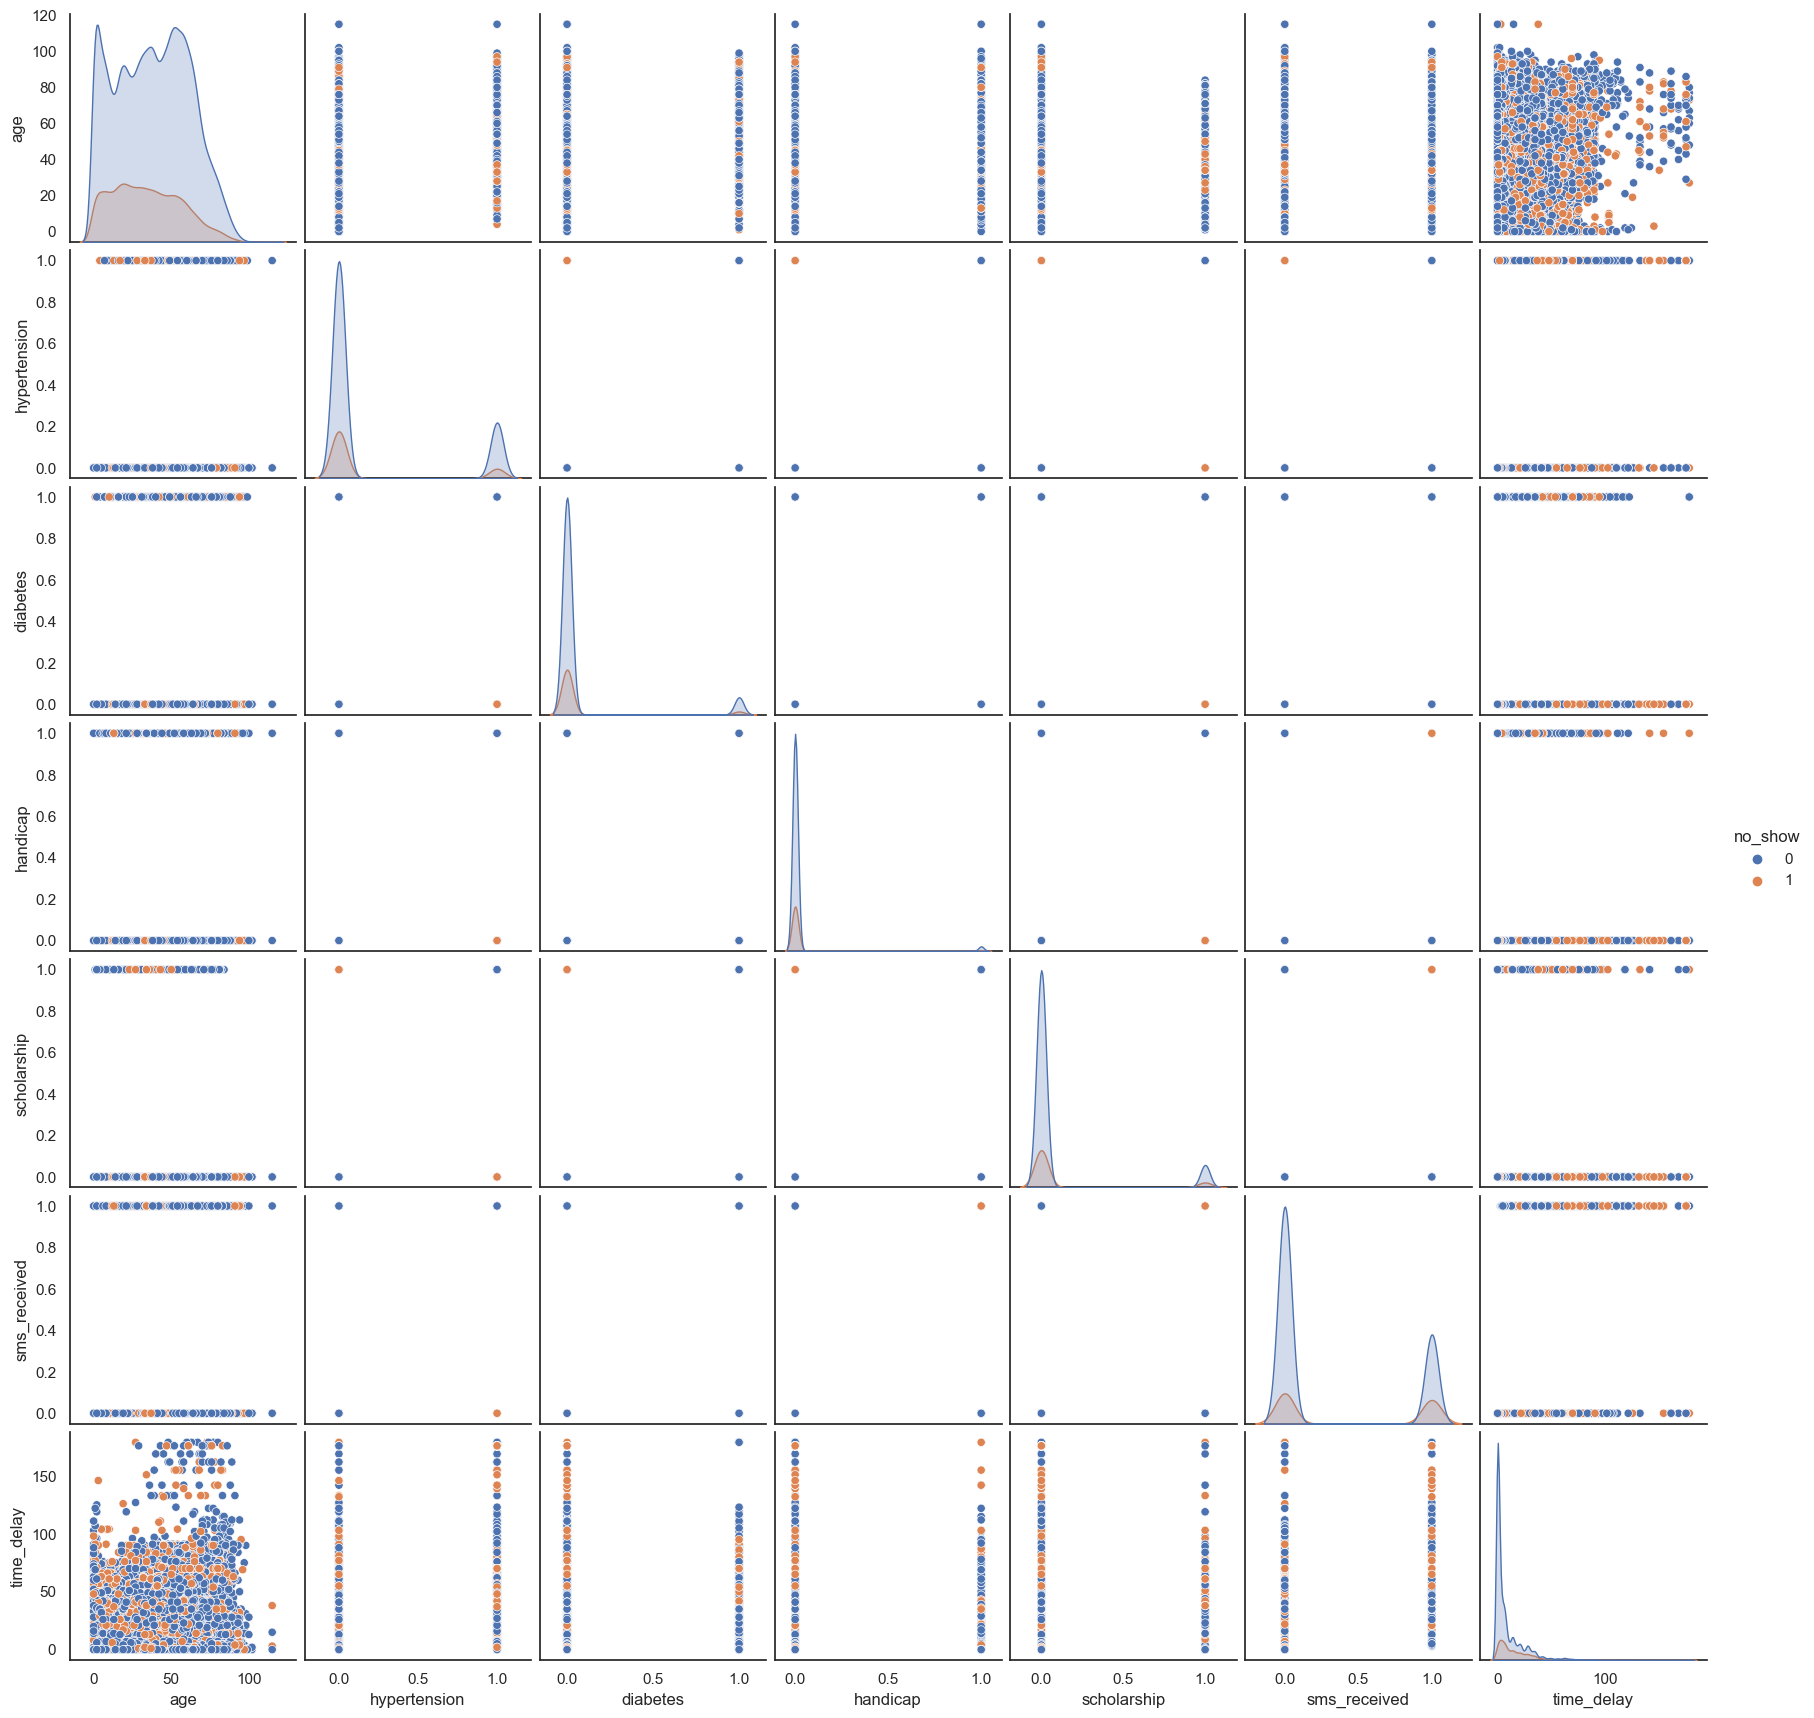

In [50]:
# Let's explore feature distribution and relationships with each other
sns.pairplot(df_patients_clean[influential_features], hue='no_show', kind='scatter', diag_kind='kde');

As it's not easy to see spot all the relationships on the scatter plot clearly, lets draw a complimentary correlation matrix

In [51]:
corr_matrix = df_patients_clean[influential_features].corr().round(2)

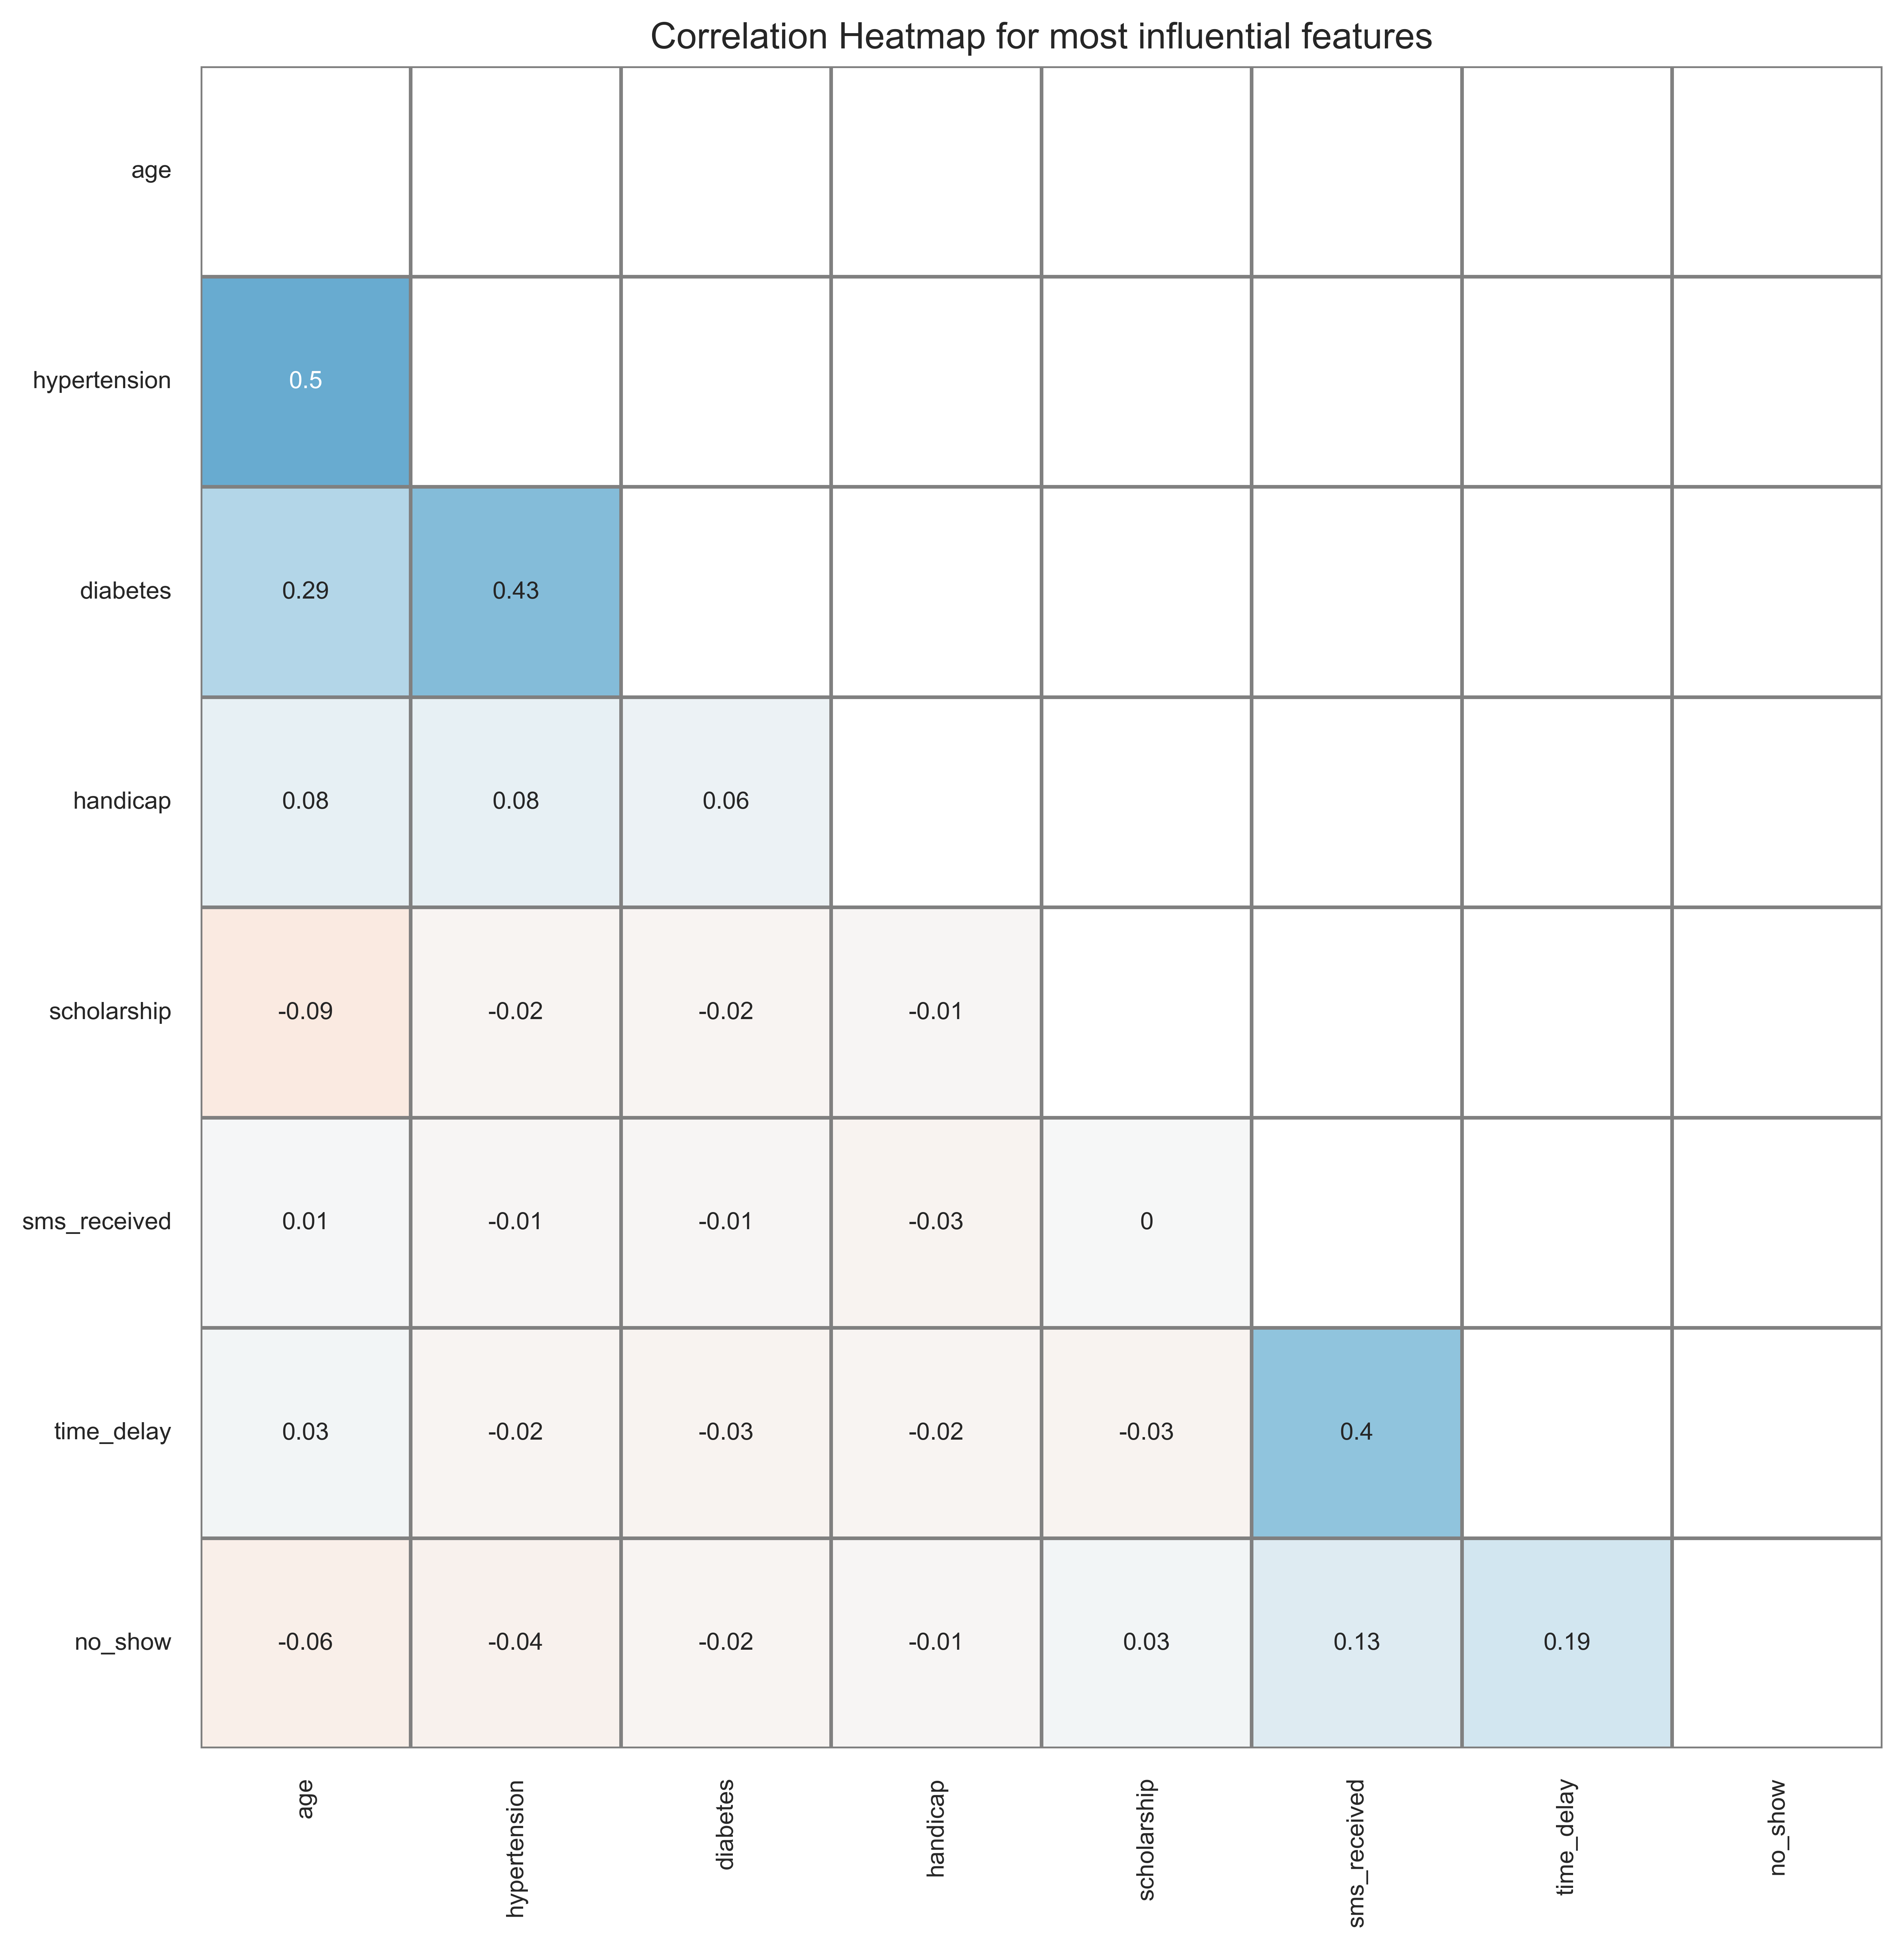

In [52]:
display_correlations(corr_matrix)

**Conclusions**:
- _age_: Patients not showing up have age are shewed to the left, means younger patients are more likely to not show up
- _age/hypertension_: Hypertension seems to occur more in older persons, which can explain why patients with hypertension are more likely to show up, as older patients are more reliable
- _scolorship/age_: scholorships are mostly present in middle age groups 20-60 years. Means it's more younger patients that receive scholorships
- _time_delay/sms_received: there seem to be a strong relationship between time delay and sms received that needs to be further investigated
- no_show, sms_received and time_delay is one again confirm as a strong relationship.

Let's explore some of these relationships a bit deeper


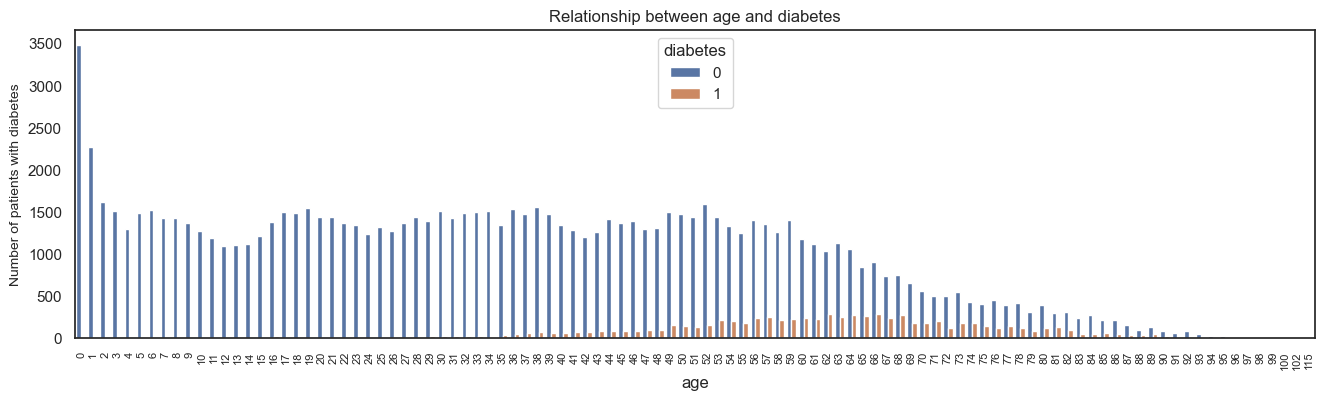

In [53]:
plot_relationships(df_patients_clean, 'age', 'diabetes')
# we can observe that diabetes are mostly present in older patients between 40 - 80

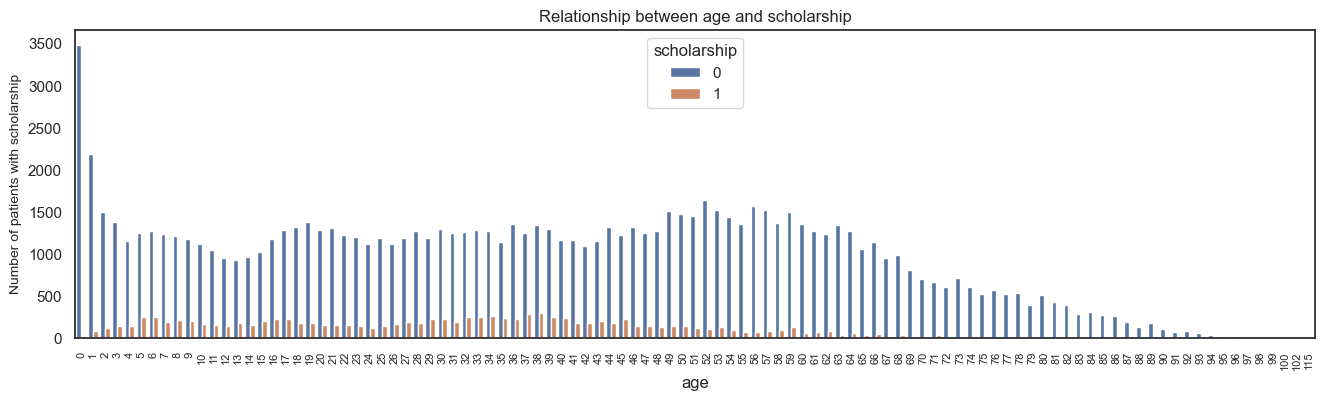

In [54]:
plot_relationships(df_patients_clean, 'age', 'scholarship')

# we can observe that scholarships are present in younger patients below 60

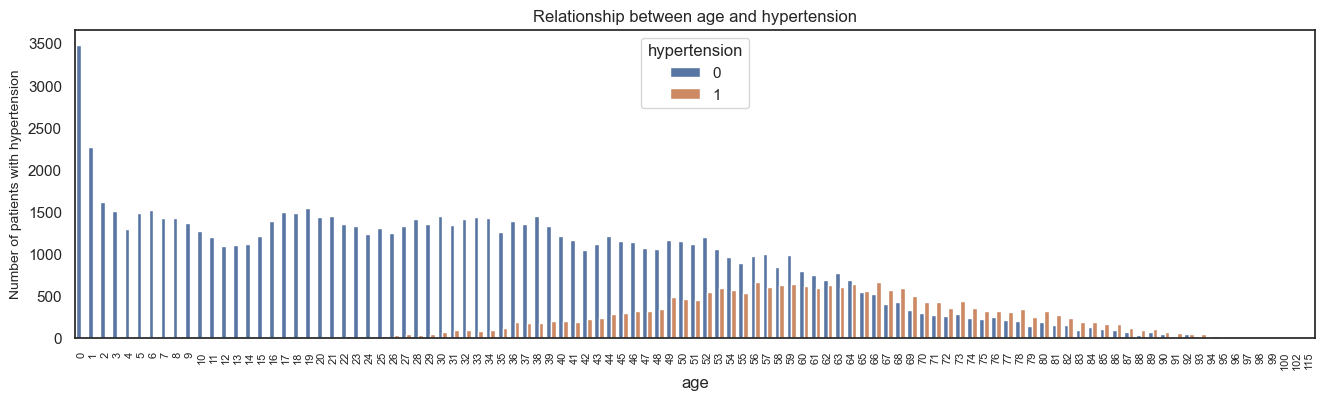

In [55]:
plot_relationships(df_patients_clean, 'age', 'hypertension')

# we can observe that hypertension occur frequently in older patients, but not much in younger patients

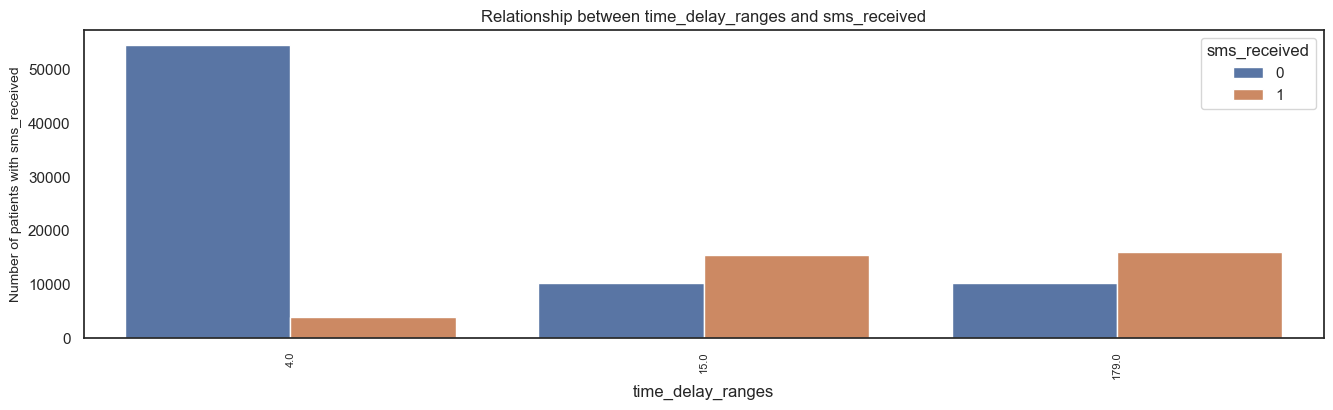

In [56]:
# show relationship between time delay ranges and sms_received
plot_relationships(df_patients_clean, 'time_delay_ranges', 'sms_received')

# we can observe patients with longer waiting times for their appointments receive more sms reminders

#### C.1.5 Inspect deceases relationship to no_show

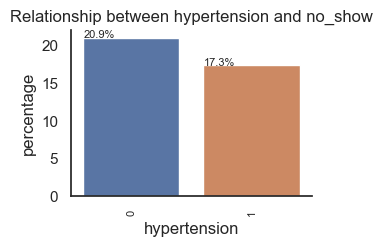

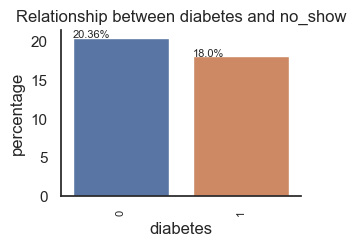

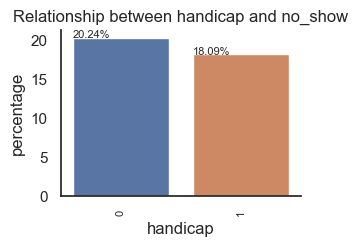

In [57]:
decease_features = ['hypertension', 'diabetes', 'handicap']
plot_proportions(df=df_patients_clean, columns=decease_features, y='no_show')

**Conclusion**

Patients with mentioned deceases are slighly more likely to show up by about 2-3 percentage points

### Research Question 2  
### C.2 Which age group are most likely to not show up?

In [58]:
# split dataset between patients showing up vs patients not showing up
df_show = df_patients_clean.query('no_show == 0').copy().reset_index(drop=True)
df_noshow = df_patients_clean.query('no_show == 1').copy().reset_index(drop=True)
print('no_show shape: {} \nshow shape: {}'.format(df_noshow.shape, df_show.shape))

no_show shape: (22307, 16) 
show shape: (88162, 16)


In [59]:
# build age ranges to condense and improve visualizations
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 120]
bin_labels = [10, 20, 30, 40, 50, 60, 70, 80, 90, 120]
df_show['age_ranges_show'] = pd.cut(df_show['age'], 
                                   bins=bin_edges,
                                   include_lowest=True,
                                   labels=bin_labels)

df_noshow['age_ranges_noshow'] = pd.cut(df_noshow['age'], 
                                   bins=bin_edges,
                                   include_lowest=True,
                                   labels=bin_labels)

In [60]:
age_show = df_show.groupby('age_ranges_show')['age_ranges_show'].count()
age_show.head(20)

age_ranges_show
10     14916
20      9791
30     10389
40     11820
50     11550
60     12940
70      9541
80      4832
90      2137
120      246
Name: age_ranges_show, dtype: int64

In [61]:
age_noshow = df_noshow.groupby('age_ranges_noshow')['age_ranges_noshow'].count()
age_noshow.head(20)

age_ranges_noshow
10     3780
20     3307
30     3393
40     3231
50     2870
60     2721
70     1648
80      889
90      406
120      62
Name: age_ranges_noshow, dtype: int64

In [62]:
age_sum = pd.concat([age_noshow, age_show], axis=1)
age_sum.columns = ['noshow', 'show']
age_sum['%show'] = age_sum['noshow'] / (age_sum['noshow'] + age_sum['show']) * 100
age_sum

,noshow,show,%show
10,3780,14916,20.218228
20,3307,9791,25.248129
30,3393,10389,24.619068
40,3231,11820,21.467012
50,2870,11550,19.902913
60,2721,12940,17.374369
70,1648,9541,14.728751
80,889,4832,15.539241
90,406,2137,15.965395
120,62,246,20.129870


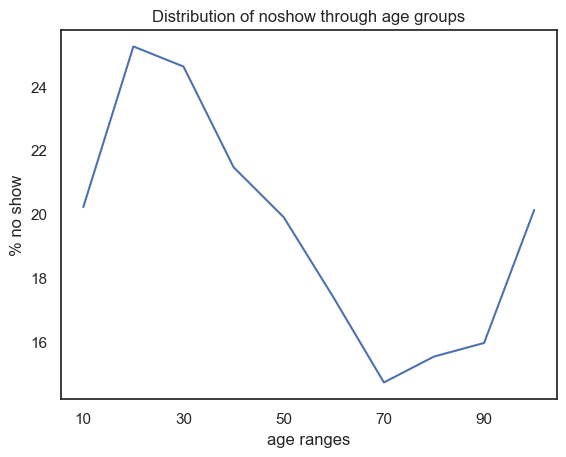

In [63]:
age_sum['%show'].plot(kind='line', 
                      xlabel='age ranges', 
                      ylabel='% no show', 
                      title='Distribution of noshow through age groups');

**Conclusion:**

It seems like younger patients from 11 - 40 years old are more likely to not show up 

### Research Question 3
### C.3 Are no shows related to certain hospitals ?

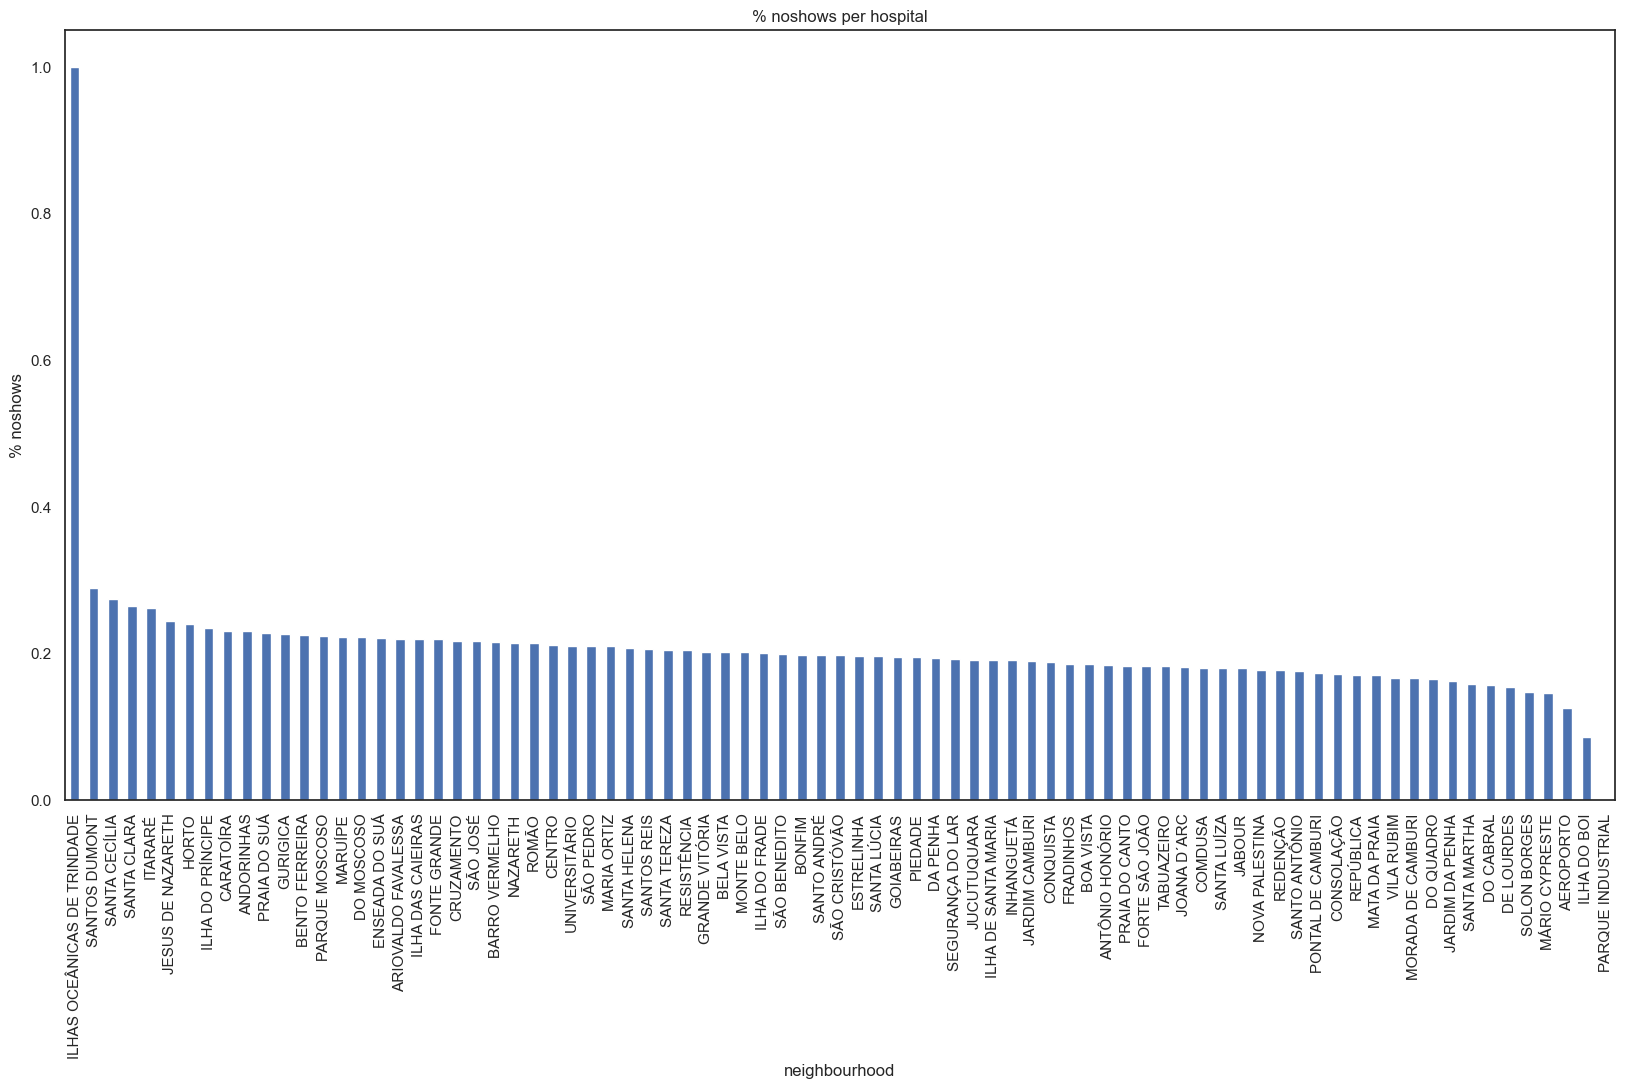

In [64]:
# calculate show/noshow proportions
df_neighbourhood = df_patients_clean.groupby(['neighbourhood'])['no_show'].mean()
df_neighbourhood.sort_values(ascending=False).plot(kind='bar', 
                                                   figsize=(20,10), 
                                                   ylabel='% noshows', 
                                                   title='% noshows per hospital');

In [65]:
# Get index of neighbourhood with maximum % no_shows
idx = df_neighbourhood.idxmax()
idx

'ILHAS OCEÂNICAS DE TRINDADE'

In [66]:
df_patients_clean.query('neighbourhood == @idx')

,,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek,gender_F,gender_M
patient_id,appointment_id,,,,,,,,,,,,,,,,
534986855114,5583947,2016-04-14,2016-05-13,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,29,179.0,4,1,0
7256429752481,5583948,2016-04-14,2016-05-13,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,29,179.0,4,1,0


**Conclusion:**

The average noshows per hospital vary between 20 - 30%. The no show problem seems to distributed accross hospitals fairly consistently. It's not that certain hostpitals cause the issue specifically

The top entry 'ILHAS OCEÂNICAS DE TRINDADE' where 100% of patients do not show up, can be ignored, as only 2 datapoints exist for this hospital

<a id='conclusions'></a>
## D. Conclusions

The most influential features to predict patient no-shows are age and waiting time for appointments.
The longer the waiting time for an appointment (date appointment was scheduled vs the actual date of the appointment), the more likely patients no-show's occur, even if sms reminders are send. 

Deceases like hypertension, diabetes and disabilities (handicap), occur more in older patients, who generally do show up for appointments more regularly, especially if these deceases are present.


# References
https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group